## Image Recognition with Convolutional Neural Network

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [44]:
#Import the fashion MNIST data set
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

No need to flatten images with Convolutional Neural Networks, here we build the input vector:

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Normalizing data for better training

In [7]:
x_train /= 255
x_test /= 255

One-hot encoding

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


Building the CNN

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [11]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [12]:
# looking at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 25)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16900)             0         
                                                                 
 dense (Dense)               (None, 100)               1690100   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,691,360
Trainable params: 1,691,360
Non-trainable params: 0
______________________________________________

In [13]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [14]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [15]:
# training the model for 10 epochs
history = model.fit(x_train, Y_train, batch_size=128, epochs=10, validation_data=(x_test, Y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
468/469 [============================>.] - ETA: 0s - loss: 0.4146 - accuracy: 0.8542WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001EEF6BE8558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - 27s 56ms/step - loss: 0.4143 - accuracy: 0.8543 - val_loss: 0.3273 - val_accuracy: 0.8823
Epoch 2

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

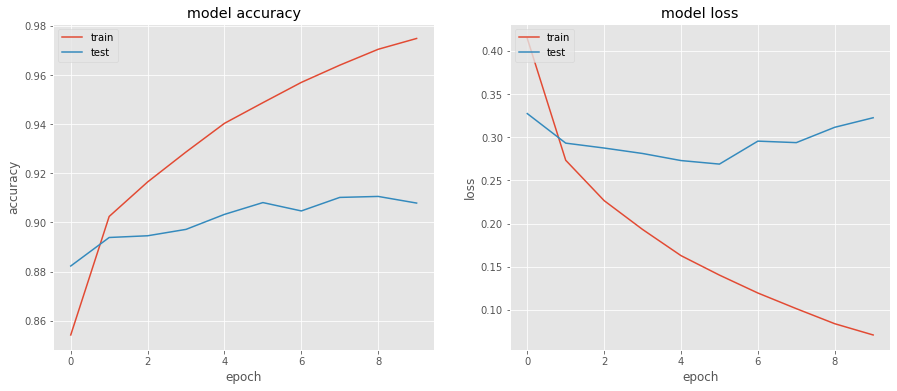

In [18]:
plt.figure(figsize=(15,6))
# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Comparison with Random Forest

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.metrics import classification_report

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
# Flatten images to 1-dimensional 784 pixels
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
#Normalize
x_train /= 255
x_test /= 255

In [10]:
#One-hot encoding of outcome variable
n_classes = 10
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

### Random Forest Classification without tuning hyperparameters

In [12]:
rf = RandomForestClassifier(verbose=1)

In [13]:
rf.fit(x_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomForestClassifier(verbose=1)

In [14]:
# predictions on test data
pred_test = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [18]:
print("Test metrics:")
print(sklearn.metrics.classification_report(y_true=Y_test, y_pred= pred_test, zero_division=1))

Test metrics:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1000
           1       1.00      0.94      0.97      1000
           2       0.86      0.67      0.75      1000
           3       0.93      0.84      0.88      1000
           4       0.86      0.70      0.77      1000
           5       0.99      0.93      0.96      1000
           6       0.89      0.41      0.56      1000
           7       0.94      0.93      0.93      1000
           8       0.99      0.94      0.96      1000
           9       0.97      0.93      0.95      1000

   micro avg       0.93      0.81      0.87     10000
   macro avg       0.93      0.81      0.86     10000
weighted avg       0.93      0.81      0.86     10000
 samples avg       0.94      0.81      0.81     10000



In [19]:
# Test accuracy is 87% without tuning. The likely cause of the long training times is the large amount of data.

### Tuning Hyperparameters with Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 600, stop = 700, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [600, 700], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [36]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 2, verbose=True, random_state=42, n_jobs = -1)

In [37]:
CVmod = rf_random.fit(x_train,Y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed: 22.7min finished


In [38]:
# Since each instance of the Random Forest model takes over two minutes to train, I've heavily streamlined the amount of...
# iterations in the cross validation. This is prioritizing speed at the cost of finding the optimal tuning for the...
# hyperparameters. With only 6 iterations the process still takes almost 23 minutes to complete.

In [40]:
CVmod.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                       n_estimators=700, verbose=1)

In [41]:
CVmod.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [42]:
# predictions on test data with new hyperparameters
pred_test_CV = CVmod.predict(x_test)

print("Test metrics:")
print(sklearn.metrics.classification_report(y_true=Y_test, y_pred= pred_test_CV, zero_division=1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test metrics:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1000
           1       1.00      0.95      0.97      1000
           2       0.86      0.70      0.77      1000
           3       0.93      0.84      0.88      1000
           4       0.84      0.71      0.77      1000
           5       0.99      0.94      0.97      1000
           6       0.87      0.44      0.58      1000
           7       0.94      0.95      0.94      1000
           8       0.99      0.95      0.97      1000
           9       0.96      0.94      0.95      1000

   micro avg       0.93      0.82      0.87     10000
   macro avg       0.93      0.82      0.86     10000
weighted avg       0.93      0.82      0.86     10000
 samples avg       0.94      0.82      0.82     10000



[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    6.9s finished


In [43]:
# The test accuracy here is 87 %, just like without tuning hyperparameters. This is likely because of us not being able to...
# do an extensive cross-validation due to limited computing power.

### Performance Comparison

The Convolutional Neural Network was able to reach a test accuracy of around 91% while the Random Forest Classifier only managed 87%. With more computing power or a more efficient algorithm maybe the Random Forest could have had better tuned hyperparameters and thus improved accuracy.